In [632]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load the 3 data sets from Word Data Bank
***
### Country dataframe

In [633]:
country = pd.DataFrame.from_csv('Capstone_data/Country.csv', index_col = None)
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [634]:
country.shape

(247, 31)

The Country data frame has 31 descriptor columns for each of the 247 rows (countries of groups of countries). Let's get a sense for how many individual countries exist and how many aggregate groupings (e.g. world, regions, income groupings). 

In [635]:
# Aggregated geographical areas will not have a currency unit, so count how many rows have null currency
len(country[country.CurrencyUnit.isnull()])

33

In [636]:
# Also check for aggregated data rows by searching for 'aggregate' in the special notes column 
text = country.SpecialNotes.fillna('0')
len(text[text.str.contains('aggregate')])

33

### Load 'Series' dataframe (renamed as metrics)

In [637]:
metrics = pd.DataFrame.from_csv('data/Series.csv', index_col = None)
metrics.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


In [638]:
metrics.shape

(1345, 20)

One row per series/metric, columns provide defintions, units, periodicity sources, etc. Now let's get a better sense for the key categories (and sub-categories) of development indicators.

In [639]:
# Highlevel topic categories
splitTopics = metrics.Topic.str.partition(':')
splitTopics.groupby([0,2]).size()
# splitTopics[splitTopics[0].str.contains('Health')].groupby([0,2]).size()

0                          2                                                                          
Economic Policy & Debt      Balance of payments: Capital & financial account                              11
                            Balance of payments: Current account: Balances                                 4
                            Balance of payments: Current account: Goods, services & income                22
                            Balance of payments: Current account: Transfers                                7
                            Balance of payments: Reserves & other items                                    6
                            External debt: Amortization                                                   18
                            External debt: Arrears, reschedulings, etc.                                   22
                            External debt: Commitments                                                     5
                         

Interested in health/life expactancy as the target indicators, so let's consider all Health metrics available

In [640]:
# all topics related to health 
health =metrics[metrics.Topic.str.contains("Health")]
health.groupby(['Topic']).size()

Topic
Health: Disease prevention       18
Health: Health services          14
Health: Mortality                22
Health: Nutrition                24
Health: Population: Dynamics     11
Health: Population: Structure     5
Health: Reproductive health      14
Health: Risk factors             15
dtype: int64

In [641]:
metrics[metrics.Topic.str.contains('Mortality')].head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
813,SH.DTH.COMM.ZS,Health: Mortality,"Cause of death, by communicable diseases and m...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
814,SH.DTH.INJR.ZS,Health: Mortality,"Cause of death, by injury (% of total)",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
815,SH.DTH.NCOM.ZS,Health: Mortality,"Cause of death, by non-communicable diseases (...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
816,SP.DTH.INFR.ZS,Health: Mortality,Completeness of infant death reporting (% of r...,NaN,Completeness of infant death reporting is the ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open
817,SP.DTH.REPT.ZS,Health: Mortality,Completeness of total death reporting (% of re...,NaN,Completeness of total death reporting is the n...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open


As initial features that could affect health/life expectancy, let's consider all indicators related to GDP and povery.

In [642]:
# Topics specifically related to GDP per capita 
metrics.IndicatorName[metrics.IndicatorName.str.contains('GDP per capita')]

295                     GDP per capita growth (annual %)
309                        GDP per capita (constant LCU)
389                   GDP per capita (constant 2005 US$)
409                         GDP per capita (current LCU)
410                         GDP per capita (current US$)
493    GDP per capita, PPP (constant 2011 internation...
494        GDP per capita, PPP (current international $)
540    Government expenditure per student, primary (%...
541    Government expenditure per student, secondary ...
542    Government expenditure per student, tertiary (...
Name: IndicatorName, dtype: object

In [643]:
metrics[metrics.IndicatorName.str.contains('GDP per capita')].head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
295,NY.GDP.PCAP.KD.ZG,Economic Policy & Debt: National accounts: Gro...,GDP per capita growth (annual %),NaN,Annual percentage growth rate of GDP per capit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
309,NY.GDP.PCAP.KN,Economic Policy & Debt: National accounts: Loc...,GDP per capita (constant LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,varies by country,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
389,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2005 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2005,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
409,NY.GDP.PCAP.CN,Economic Policy & Debt: National accounts: US$...,GDP per capita (current LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
410,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for cur...",NaN,NaN,NaN,NaN,Open


In [644]:
# Also considering topics related to Poverty
economic =metrics[metrics.Topic.str.contains("Poverty")]
economic.groupby(['Topic']).size()

Topic
Poverty: Income distribution     8
Poverty: Poverty rates          10
Poverty: Shared prosperity       6
dtype: int64

### Load 'Indicators' dataframe (renamed as 'df')
***

In [645]:
df = pd.DataFrame.from_csv('data/indicators.csv', index_col=None)
df.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [646]:
df.shape

(5656458, 6)

One row per indicator per country per year (5656458 rows × 6 columns)
Let's assess the frequency of data for specific metrics, by country and indicators. And, let's understand how missing vaules are handled. We can see from below that when indicators aren't available, they are ommited completely (vs. provided as null)

In [647]:
#checking availability of data and how missing values are handled
df[df.IndicatorName.str.contains('GDP per capita')].groupby(['CountryName', 'IndicatorName']).size().unstack()

IndicatorName,GDP per capita (constant 2005 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (constant 2011 international $)","GDP per capita, PPP (current international $)",Government expenditure per primary student as % of GDP per capita (%),Government expenditure per secondary student as % of GDP per capita (%),Government expenditure per tertiary student as % of GDP per capita (%)
CountryName,,,,,,,,,,
Afghanistan,13.0,13.0,36.0,36.0,12.0,13.0,13.0,NaN,NaN,NaN
Albania,35.0,35.0,35.0,31.0,34.0,25.0,25.0,NaN,NaN,NaN
Algeria,55.0,55.0,55.0,55.0,54.0,25.0,25.0,4.0,4.0,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Andorra,44.0,44.0,44.0,44.0,43.0,NaN,NaN,9.0,9.0,5.0
Angola,1.0,18.0,29.0,29.0,17.0,1.0,1.0,NaN,NaN,2.0
Antigua and Barbuda,38.0,38.0,38.0,38.0,37.0,25.0,25.0,1.0,2.0,1.0
Arab World,40.0,NaN,NaN,47.0,39.0,25.0,25.0,NaN,NaN,NaN
Argentina,55.0,55.0,55.0,53.0,54.0,NaN,NaN,15.0,15.0,15.0


In [648]:
#Confirming how missing values are handled; for Afganistan and 'GDP per capita (2005), the 13 values are consecutive year. 
#When data is not available, it is omitted rather than having a null value per that year
df[(df.IndicatorCode =='NY.GDP.PCAP.KD') & (df.CountryName == 'Afghanistan')].sort_values('Year')

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3494844,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2002,239.699451
3649897,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2003,248.156635
3803733,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2004,240.184904
3964959,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2005,257.175795
4144830,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2006,263.012374
4322452,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2007,291.128823
4502763,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2008,294.238183
4682308,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2009,347.208097
4862365,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,366.324813
5047724,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,377.292766


In [649]:
#Comparing the available Life Expectancy metrics, is there one that's much better populated? No.
df[df.IndicatorName.str.contains('Life expectancy')].groupby(['CountryName', 'IndicatorName']).size().unstack().head()

IndicatorName,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)"
CountryName,,,
Afghanistan,54,54,54
Albania,54,54,54
Algeria,54,54,54
Angola,54,54,54
Antigua and Barbuda,54,54,54


Selected metrics
- Target indicator of health & life expectancy, selected: SP.DYN.LE00.IN - Life expectancy at birth, total (years) which is populated for 54 years of data
- For initial features: 
Of per-capita-measures of GDP, the following is most-densely populated: NY.GDP.PCAP.CD	- GDP per capita (current US)

## Data wrangling & inferential statistics
*** 

1. Transform the data frame into a more workable state, using Pivot_table() 
2. Create a data frame for all countries with a multi-variate index (CountryName & year) and 4 initial data columns: GDP, the annual change in GDP (gdp_diff), life expectancy, and the annual change in life expectancy (le_diff)
3. Plot time series and a scatter plot to observe the relationship between GDP and life expectancy. Not surprisingly, both metrics have increased over the past 55 years. To be determined whether this is a causation or correlation (admittedly difficult to completely tease apart the numerous other confounding factors that influence life expectancy and GDP)
4. plot the correlation

In [650]:
# Linear regression (world): with change in GDP as the  X variable
X = world_df[['GDP_diff']].iloc[:-1]
y = world_df['LifeExpectancy_diff'].iloc[1:]
lr = LinearRegression()
lrwGDP = lr.fit(X,y).score(X,y)

# Linear regression (world): with change in LifeExpectancy as the  X variable
X = world_df[['LifeExpectancy_diff']].iloc[:-1]
y = world_df['GDP_diff'].iloc[1:]
lr = LinearRegression()
lr_wLE = lr.fit(X,y).score(X,y)

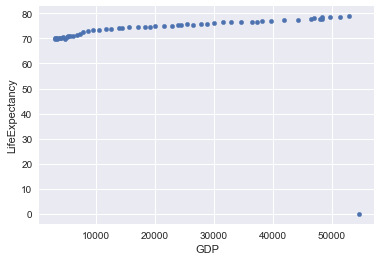

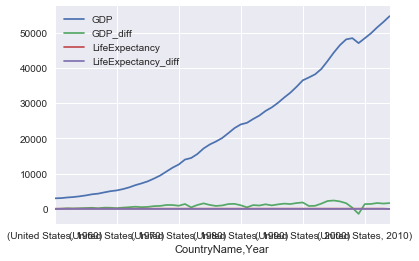

In [651]:
#Just life expectency for the US
le_us = df[(df.CountryName =='United States') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_us = le_us.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])

#GDP for US
gdp_us = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='United States')]
gdp_us = gdp_us.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])

# concatenated data frame 
us_df = pd.concat([gdp_us, gdp_us.diff(), le_us, le_us.diff()], axis=1)
us_df.columns = ['GDP', 'GDP_diff','LifeExpectancy', 'LifeExpectancy_diff']
us_df.fillna(0, inplace=True)

us_df.plot.scatter(x = 'GDP', y = 'LifeExpectancy')
us_df.plot()

In [652]:
#Life Expectancy - World
le_world = df[(df.CountryName == 'World') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_world = le_world.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])
#GDP for world
gdp_world = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='World')]
gdp_world = gdp_world.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])

# Combined data fram for world
world_df = pd.concat([gdp_world, gdp_world.diff(), le_world, le_world.diff()], axis=1)
world_df.columns = ['GDP', 'GDP_diff','LifeExpectancy', 'LifeExpectancy_diff']
world_df.fillna(0, inplace=True)
world_df.head()

GDP   GDP_diff  LifeExpectancy  LifeExpectancy_diff
CountryName Year                                                            
World       1960  450.289472   0.000000       52.499842             0.000000
            1961  462.285277  11.995806       53.004380             0.504538
            1962  487.959281  25.674003       53.471810             0.467429
            1963  514.438304  26.479023       54.097448             0.625639
            1964  552.413459  37.975155       54.913004             0.815556

In [653]:
# Linear regression (US): with change in GDP as the  X variable
X = us_df[['GDP_diff']].iloc[:-1]
y = us_df['LifeExpectancy_diff'].iloc[1:]
lr = LinearRegression()
lr_usGDP = lr.fit(X,y).score(X,y)

# Linear regression (US): with change in LifeExpectancy as the  X variable
X = us_df[['LifeExpectancy_diff']].iloc[:-1]
y = us_df['GDP_diff'].iloc[1:]
lr = LinearRegression()
lr_usLE = lr.fit(X,y).score(X,y)

### Preliminary assessment
Preliminary analysis showed little correlation between GDP per capita and life expectancy. There is a pretty weak correlation (R^2 of 0.014 when GDP is X and ~0 when Life Expectancy is the independent variable). 

### Next step is expand analysis from US and aggregate world to all countries
- restructure the dataframe to include all countries for specific indicator, the difference, and the normalized difference
- Use a heatmap to vizualize the correlation between the mean change (GDP, GDP_diff, Life Expectancy, and Life expectancy diff) for all countries

In [654]:
#Life expectency for all countries
life_exp = df[df.IndicatorCode == 'SP.DYN.LE00.IN']
life_exp = life_exp.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])

#GDP for all countries 
gdp = df[df.IndicatorCode =='NY.GDP.PCAP.CD']
gdp = gdp.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])

# concatenated data frame 
df_ml = pd.concat([life_exp, life_exp.diff(), gdp, gdp.diff()], axis=1)
df_ml.columns = ['LifeExpectancy', 'LifeExpectancy_diff','GDP', 'GDP_diff']
df_ml.fillna(0, inplace=True)
df_ml

LifeExpectancy  LifeExpectancy_diff         GDP    GDP_diff
CountryName Year                                                             
Afghanistan 1960       32.328512             0.000000   59.787681    0.000000
            1961       32.777439             0.448927   59.890037    0.102356
            1962       33.219902             0.442463   58.505995   -1.384042
            1963       33.657878             0.437976   78.802587   20.296592
            1964       34.092878             0.435000   82.231395    3.428808
            1965       34.525390             0.432512  101.321627   19.090233
            1966       34.957415             0.432024  137.946783   36.625156
            1967       35.389415             0.432000  161.384702   23.437919
            1968       35.822415             0.433000  129.562318  -31.822383
            1969       36.260390             0.437976  129.857378    0.295060
            1970       36.702829             0.442439  157.258461   27.401083
            1971       37.152756             0.449927  160.443152    3.184691
            1972       37.610146             0.457390  136.175611  -24.267540
            1973       38.078537             0.468390  144.173944    7.998333
            1974       38.560902             0.482366  175.027098   30.853153
            1975       39.059293             0.498390  188.085136   13.058038
            1976       39.575707             0.516415  199.164809   11.079673
            1977       40.110146             0.534439  226.196427   27.031617
            1978       40.667610             0.557463  249.573710   23.377283
            1979       41.250585             0.582976  278.390625   28.816915
            1980       41.867537             0.616951  275.649828   -2.740797
            1981       42.526927             0.659390  267.662424   -7.987405
            1982       43.230732             0.703805    0.000000    0.000000
            1983       43.975927             0.745195    0.000000    0.000000
            1984       44.759024             0.783098    0.000000    0.000000
            1985       45.577024             0.818000    0.000000    0.000000
            1986       46.426951             0.849927    0.000000    0.000000
            1987       47.296341             0.869390    0.000000    0.000000
            1988       48.169732             0.873390    0.000000    0.000000
            1989       49.031122             0.861390    0.000000    0.000000
...                          ...                  ...         ...         ...
Zimbabwe    1985       61.859098             0.275146  636.072785 -108.753856
            1986       61.925317             0.066220  675.900518   39.827733
            1987       61.753805            -0.171512  706.948153   31.047635
            1988       61.322634            -0.431171  792.030153   85.082000
            1989       60.612878            -0.709756  813.583737   21.553585
            1990       59.583073            -1.029805  837.769056   24.185319
            1991       58.197171            -1.385902  802.885143  -34.883913
            1992       56.491976            -1.705195  612.672013 -190.213130
            1993       54.538707            -1.953268  583.112540  -29.559474
            1994       52.422122            -2.116585  600.400007   17.287467
            1995       50.239000            -2.183122  608.678244    8.278237
            1996       48.087634            -2.151366  720.103431  111.425188
            1997       46.065902            -2.021732  707.269654  -12.833777
            1998       44.272585            -1.793317  523.603770 -183.665885
            1999       42.791488            -1.481098  554.226812   30.623042
            2000       41.689439            -1.102049  535.197422  -19.029390
            2001       40.996805            -0.692634  537.717483    2.520061
            2002       40.679146            -0.317659  499.716415  -38.001068
            2003       40.702488        

In [655]:
means = df_ml.groupby(level='CountryName').mean()
# means = df_ml.mean()
corr = means.corr()
corr

,LifeExpectancy,LifeExpectancy_diff,GDP,GDP_diff
LifeExpectancy,1.000000,0.247893,-0.025074,-0.237553
LifeExpectancy_diff,0.247893,1.000000,0.300163,0.157923
GDP,-0.025074,0.300163,1.000000,0.501627
GDP_diff,-0.237553,0.157923,0.501627,1.000000


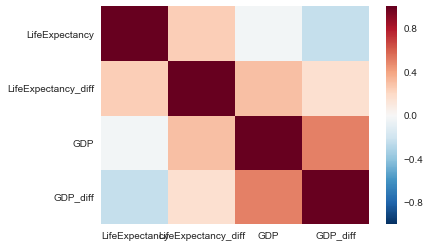

In [656]:
ax = sns.heatmap(corr)

## TO DO: create a function to add a value and diff

In [686]:
# normalized the diff, then make it a function with df and indicator as inputs (to concatenate to df)
# df_worldtopics = pd.merge(df[df.CountryName == 'World'], metrics, left_on='IndicatorCode', right_on='SeriesCode', how='left')
                               
def new_col(working_df, new_indicator, name):
    new_indicator = new_indicator.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])
    working_df[name] = new_indicator
    working_df[name+'_diff'] = new_indicator.diff()

    norm_diff = []
    diff = name+'_normdiff' 

    # Create series with normalized difference for the indicator
    for country in range(len(test2.groupby(level='CountryName'))): 
        for year in range(len(test2.groupby(level='Year'))): 
# this needs to be grouping for just this country
            value = working_df[name+'_diff'].iloc[year]/working_df[name].iloc[year]
            norm_diff.append(value)
    norm_diff = pd.Series(norm_diff, index=working_df) 
    working_df[diff] = norm_diff 
    working_df.fillna(0, inplace=True) 
    
    return working_df

gdp = df[df.IndicatorCode =='SP.DYN.LE00.IN']
test2 = new_col(df_ml, gdp, 'LifeExpectancy')
test2

ValueError: Wrong number of items passed 13420, placement implies 12888